In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('kidney.tif',0)

cv2_imshow(img)
h = int(img.shape[0])
w = int(img.shape[1])
thresh = 150
mask = np.zeros([h,w])
for x in range(0,h):
  for y in range(0,w):
    if img[x,y] < thresh:
      mask[x,y] = 0
    else:
      mask[x,y] = 255

result = np.zeros([h,w])
for x in range(0,h):
  for y in range(0,w):
    result[x,y] = img[x,y] and mask[x,y]
cv2_imshow(result)

for x in range(0,h):
  for y in range(0,w):
    if img[x,y] < thresh:
      result[x,y] = img[x,y] or mask[x,y]
    else:
      result[x,y] = 255
cv2_imshow(result)

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import math

img = cv2.imread('lowcon.tif',0)

cv2_imshow(img)
h = int(img.shape[0])
w = int(img.shape[1])
Smin = 0
Smax = 255
Rmin = np.amin(img)
Rmax = np.amax(img)
print(f'Rmin={Rmin},Rmax={Rmax},Smin={Smin},Smax={Smax}')
result = np.zeros([h,w])

for x in range(0,h):
  for y in range(0,w):
    R = int(img[x,y])
    S = ((Smax-Smin)/(Rmax-Rmin))*(R-Rmin)+Smin
    result[x,y] = S
cv2_imshow(result)
count = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = img[x][y]
    count[val] += 1
plt.plot(count)
plt.xlim([0,256])
plt.show()
count = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = int(result[x][y])
    count[val] += 1
plt.plot(count)
plt.xlim([0,256])
plt.show()

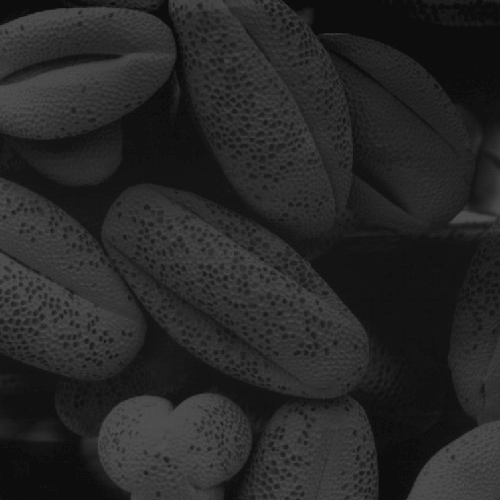

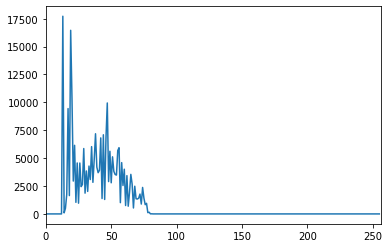

250000


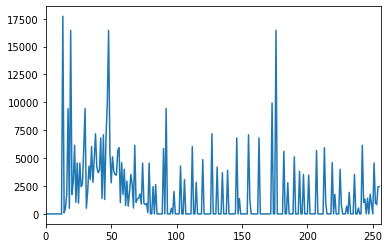

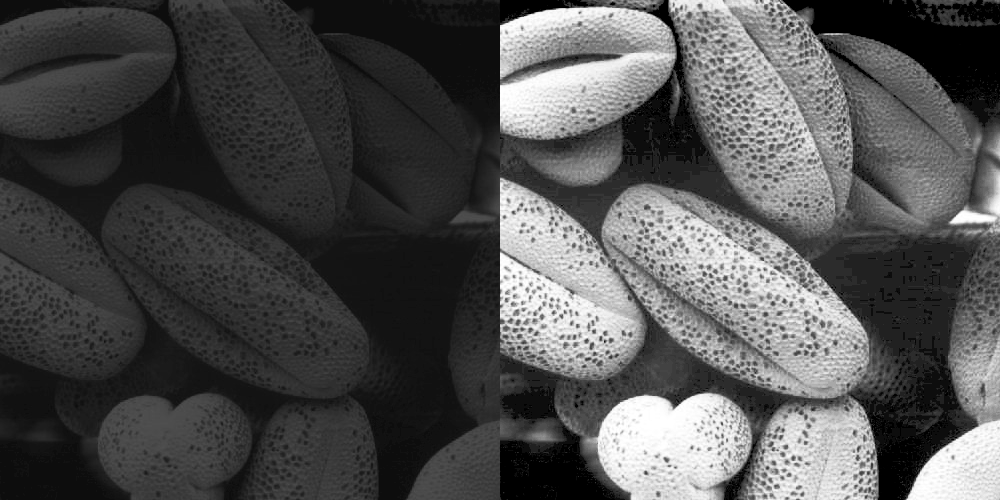

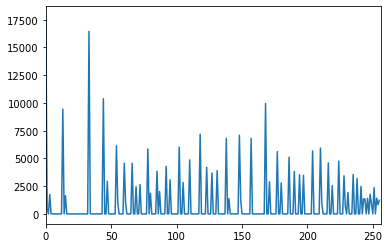

In [54]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import math

img = cv2.imread('dark.tif',0)

cv2_imshow(img)
h = int(img.shape[0])
w = int(img.shape[1])
dim = h * w
count = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = img[x][y]
    count[val] += 1
plt.plot(count)
plt.xlim([0,256])
plt.show()
print(dim)
"""
Normalising
"""
normalised = np.zeros([256])
for x in range(0,255):
  normalised[x] = count[x] / dim

"""
Finding cumulative
"""
for x in range(0,255):
  if x == 0:
    normalised[x] = normalised[x]
  else:
    normalised[x] = normalised[x-1] + normalised[x]

for x in range(0,255):
  normalised[x] = int(255 * normalised[x])

"""
Mapping
"""
for x in range(0,255):
  mapindex = int(normalised[x])
  count[mapindex] = count[x]

plt.plot(count)
plt.xlim([0,256])
plt.show()

"""
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) 
cv2_imshow(res)

count2 = np.zeros([256])
for y in range(0,w):
  for x in range(0,h):
    val = int(equ[x][y])
    count2[val] += 1
plt.plot(count2)
plt.xlim([0,256])
plt.show()
"""